# Multiple Subplots

Sometimes it is helpful to compare different visualization side by side. To achieve this, Matplotlib has the concept of _subplots_: groups of smaller axes that can exist together within a single figure. In this notebook we'll explore four routines for creating such subplots.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## `plt.axes`: Subplots by Hand

The most basic method of creating an axes is to use the `plt.axes` function. By default this creates a standard axes object that fills the entire figure. `plt.axes` also takes an optional argument that represent the `[left, bottom, width, height]` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

Let's create an inset axes at the top-right corner of another axes as an example. By setting the _x_ and _y_ position to 0.65 and their extents to 0.2, we'll have a subplot that starts at 65% of the width and height of the original figure, with 20% it's original size:

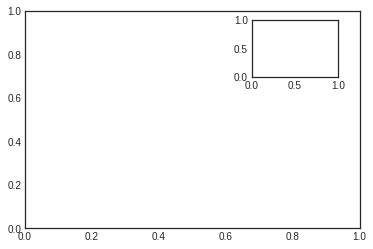

In [2]:
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is `fig.add_axes()`. Let's use this to create two vertically stacked axes:

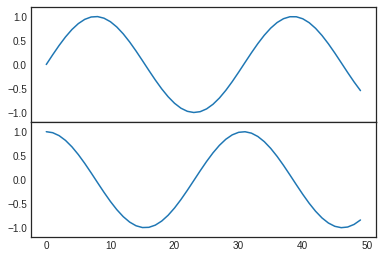

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## `plt.subplot`: Simple Grids of Subplots

Matplotlib has several convenience routines that make aligned columns or rows of subplots easy to create. The lowest level of these is `plt.subplot()`, which creates a single subplot within a grid. This command takes three integer arguments: the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

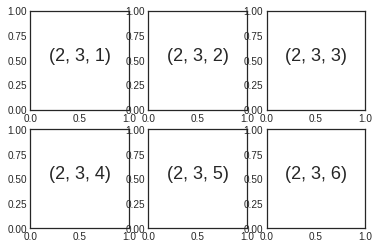

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command `plt.subplots_adjust` can be used to adjust the spacing between these plots. The following is the equivalent object-oriented command, `fig.add_subplot()`:

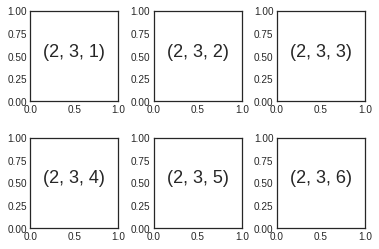

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

The `hspace` and `wspace` arguments of `plt.subplots_adjust` specify the spacing along the height and width of the figure in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## `plt.subplots`: The Whole Grid in One Go

Creating subplots as described above can become quite tedious and cumbersome very quickly when dealing with a large grid of subplots. For this purpose `plt.subplots()` is the easier tool to use. Rather than creating a single subplots, this function creates a full grid of subplots in a single line, returning them in a NumPy array. The arguments are the number of rows and columns, along with optional keywords `sharex` and `sharey`, which allow us to specify the relationships between different axes.

We'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

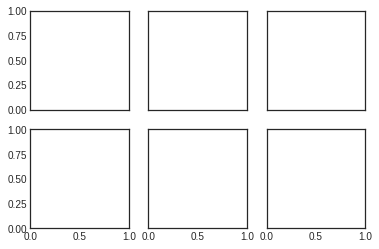

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

By specifying `sharex` and `sharey` we've automatically removed inner labels to make the plot cleaner. We can conveniently specify the desired axes using standard array indexing notation:

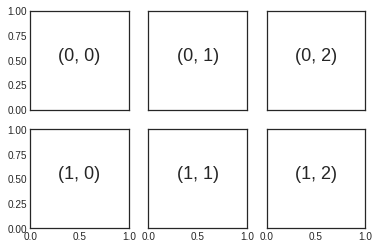

In [7]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to `plt.subplot()`, `plt.subplots()` is more consistent with Python's conventional 0-based indexing.

## `plt.GridSpec`: More Complicated Arrangements

`plt.GridSpec()` allows us to go beyond the regular grid of subplots. The `plt.GridSpec()` object does not create a plot by itself; it is simply a convenient interface that is recognized by the `plt.subplot()` command. As an example, we'll create a gridspec for a grid of two row and three columns, with some specified width and height space:

In [8]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

From this we can specify subplot locations and extents using Python slicing syntax:

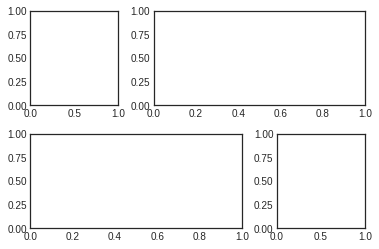

In [9]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

We can use this type of flexible grid alignment for creating multi-axes histogram plots like the ones shown here, as an example:

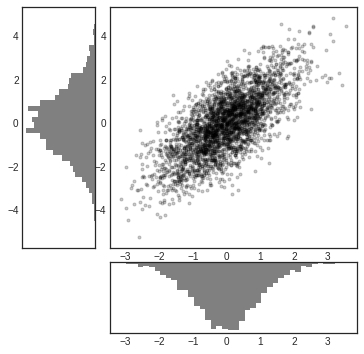

In [10]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

As a side note, this type of distribution plotted alongside its margins is common enough that it has its own plotting API in the Seaborn package.